In [45]:
import daft

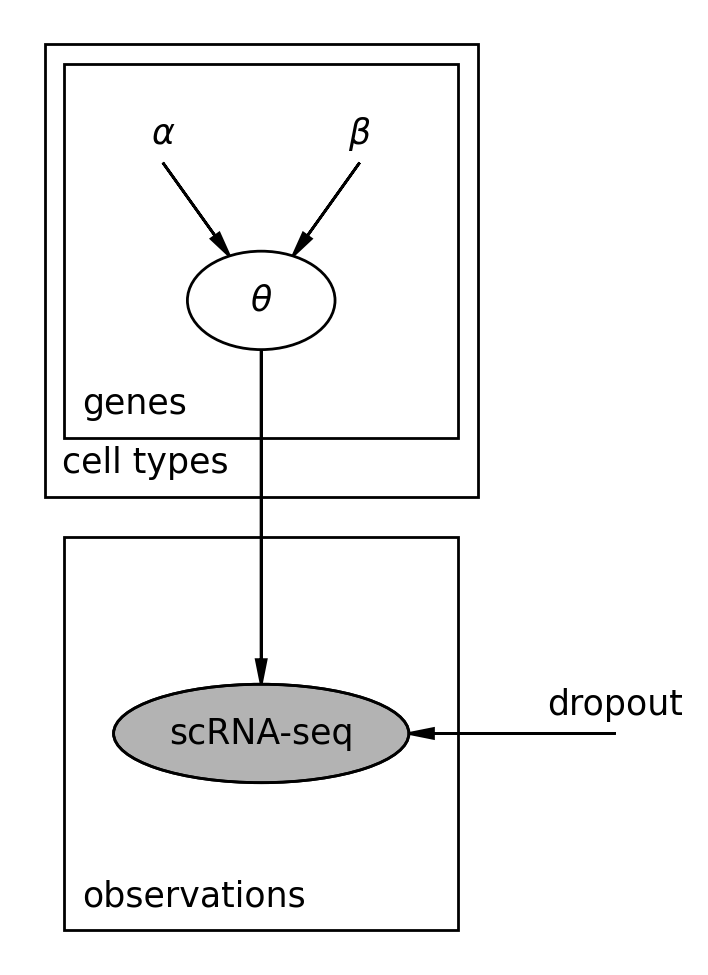

In [46]:
# Gamma
p = daft.PGM(aspect=3, dpi=250, line_width=0.8)

p.add_plate([0, 0.3, 2, 1.9], label="genes")
p.add_plate([-0.1, 0, 2.2, 2.3], label="cell types")
p.add_plate([0, -2.2, 2,2], label="observations")

p.add_node("theta", r"$\theta$", 1, 1, aspect=1.5)
p.add_node("alpha", r"$\alpha$", 0.5, 1.7, scale=0, fixed=True)
p.add_node("beta", r"$\beta$", 1.5, 1.7, scale=0, fixed=True)

p.add_node("scRNA-seq", "scRNA-seq", 1, -1.2, observed=True)

p.add_node("dropout", "dropout", 2.8, -1.2, scale=0, fixed=True)
p.add_edge("dropout", "scRNA-seq")


p.add_edge("alpha", "theta")
p.add_edge("beta", "theta")
p.add_edge("theta", "scRNA-seq")

p.render()
p.savefig("../deconV/figures/gamma.pdf")

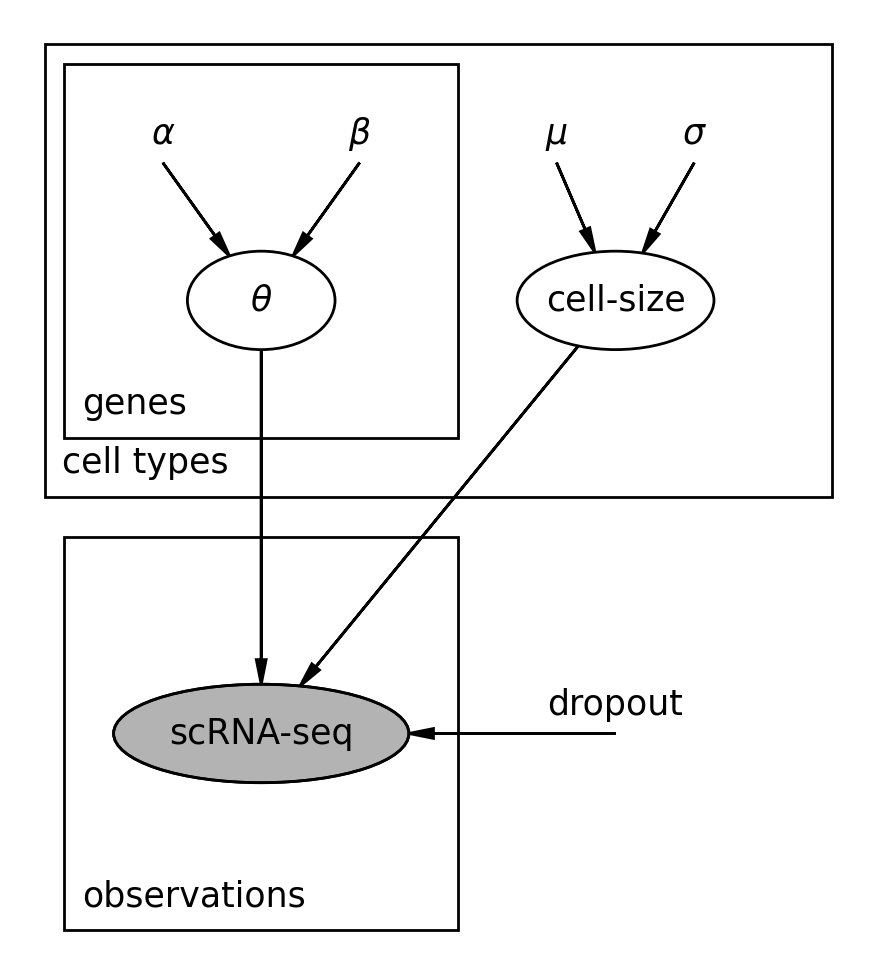

In [47]:
# Beta
p = daft.PGM(aspect=3, dpi=250, line_width=0.8)
p.add_plate([0, 0.3, 2, 1.9], label="genes")
p.add_plate([-0.1, 0, 4, 2.3], label="cell types")
p.add_plate([0, -2.2, 2,2], label="observations")

p.add_node("theta", r"$\theta$", 1, 1, aspect=1.5)
p.add_node("cell_size", "cell-size", 2.8, 1, aspect=2.0)

p.add_node("alpha", r"$\alpha$", 0.5, 1.7, scale=0, fixed=True)
p.add_node("beta", r"$\beta$", 1.5, 1.7, scale=0, fixed=True)
p.add_node("mu_cell_size", r"$\mu$", 2.5, 1.7, scale=0, fixed=True)
p.add_node("std_cell_size", r"$\sigma$", 3.2, 1.7, scale=0, fixed=True)

p.add_node("scRNA-seq", "scRNA-seq", 1, -1.2, observed=True)
p.add_node("dropout", "dropout", 2.8, -1.2, scale=0, fixed=True)
p.add_edge("dropout", "scRNA-seq")


p.add_edge("alpha", "theta")
p.add_edge("beta", "theta")
p.add_edge("mu_cell_size", "cell_size")
p.add_edge("std_cell_size", "cell_size")
p.add_edge("cell_size", "scRNA-seq")
p.add_edge("theta", "scRNA-seq")

p.render()
p.savefig("../deconV/figures/beta.pdf")

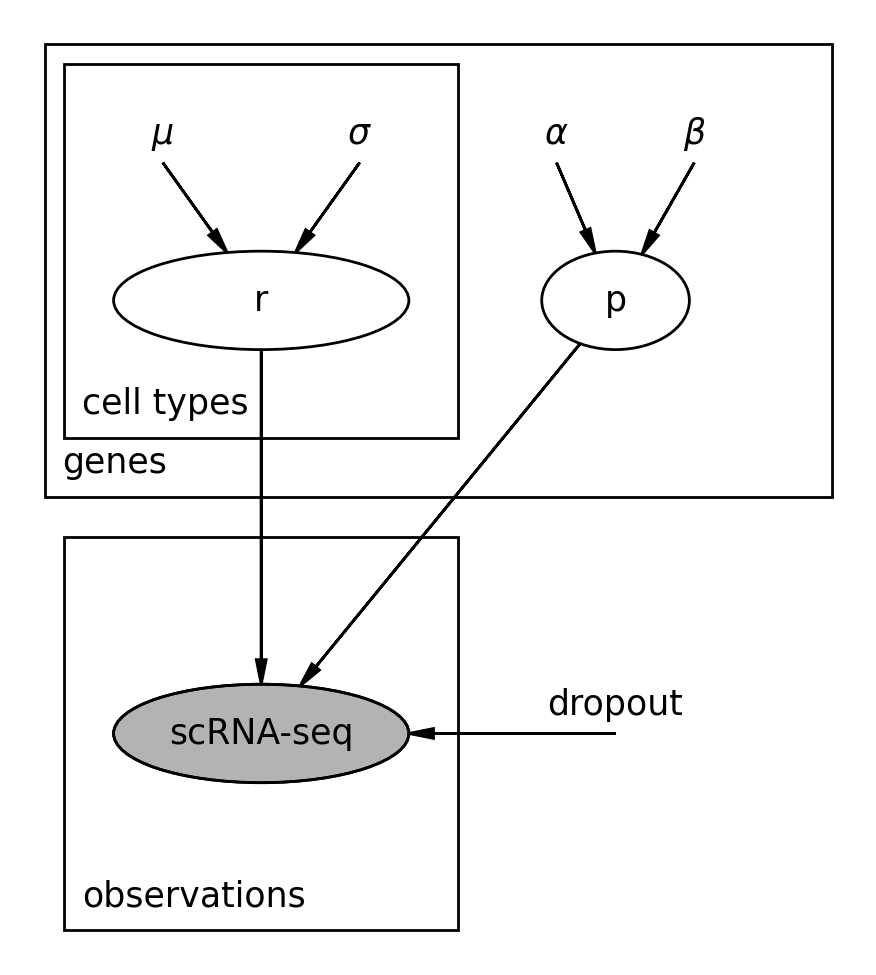

In [54]:
# NB
p = daft.PGM(aspect=3, dpi=250, line_width=0.8)
p.add_plate([0, 0.3, 2, 1.9], label="cell types")
p.add_plate([-0.1, 0, 4, 2.3], label="genes")
p.add_plate([0, -2.2, 2,2], label="observations")

p.add_node("p", "p", 2.8, 1, aspect=1.5)

p.add_node("alpha", r"$\alpha$", 2.5, 1.7, scale=0, fixed=True)
p.add_node("beta", r"$\beta$", 3.2, 1.7, scale=0, fixed=True)
p.add_node("r", "r", 1, 1)
p.add_node("mu_r", r"$\mu$", 0.5, 1.7, scale=0, fixed=True)
p.add_node("std_r", r"$\sigma$", 1.5, 1.7, scale=0, fixed=True)

p.add_node("scRNA-seq", "scRNA-seq", 1, -1.2, observed=True)

p.add_node("dropout", "dropout", 2.8, -1.2, scale=0, fixed=True)
p.add_edge("dropout", "scRNA-seq")

p.add_edge("alpha", "p")
p.add_edge("beta", "p")

p.add_edge("mu_r", "r")
p.add_edge("std_r", "r")

p.add_edge("r", "scRNA-seq")
p.add_edge("p", "scRNA-seq")

p.render()
p.savefig("../deconV/figures/NB.pdf")

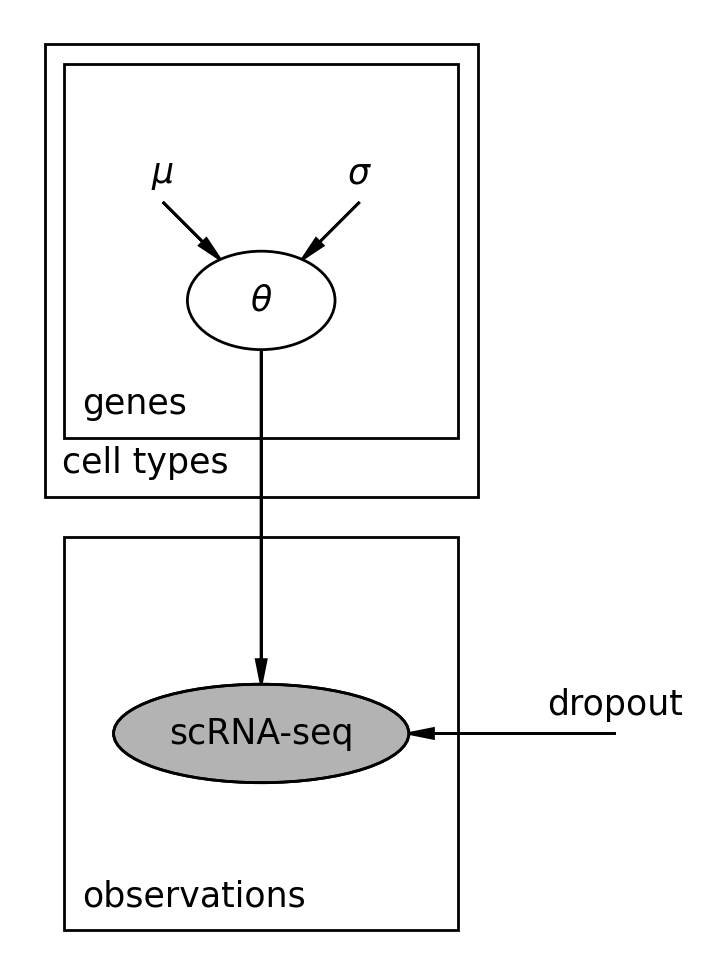

In [49]:
# LogNormal
p = daft.PGM(aspect=3, dpi=250, line_width=0.8)
p.add_plate([0, 0.3, 2, 1.9], label="genes")
p.add_plate([-0.1, 0, 2.2, 2.3], label="cell types")
p.add_plate([0, -2.2, 2,2], label="observations")

p.add_node("theta", r"$\theta$", 1, 1, aspect=1.5)

p.add_node("mu", r"$\mu$", 0.5, 1.5, scale=0, fixed=True)
p.add_node("sigma", r"$\sigma$", 1.5, 1.5, scale=0, fixed=True)

p.add_node("scRNA-seq", "scRNA-seq", 1, -1.2, observed=True)

p.add_node("dropout", "dropout", 2.8, -1.2, scale=0, fixed=True)
p.add_edge("dropout", "scRNA-seq")

p.add_edge("mu", "theta")
p.add_edge("sigma", "theta")
p.add_edge("theta", "scRNA-seq")

p.render()
p.savefig("../deconV/figures/lognormal.pdf")

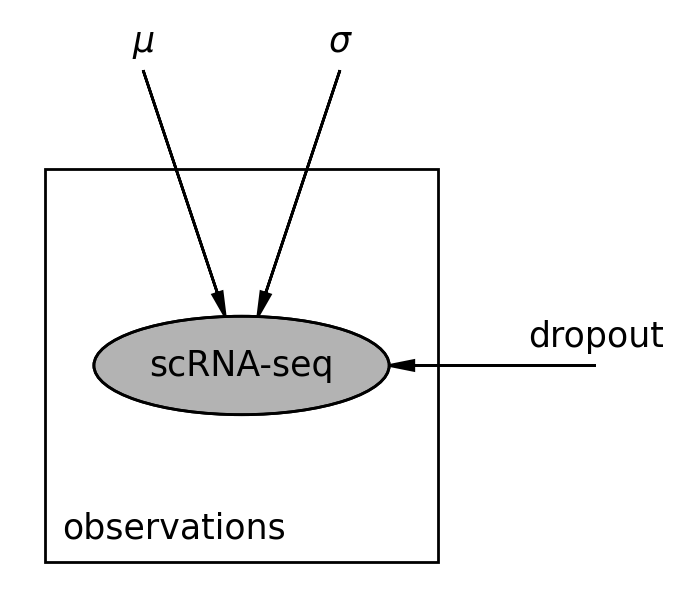

In [50]:
# Static
p = daft.PGM(aspect=3, dpi=250, line_width=0.8)
p.add_plate([0, 0, 2,2], label="observations")


p.add_node("mu", r"$\mu$", 0.5, 2.5, scale=0, fixed=True)
p.add_node("sigma", r"$\sigma$", 1.5, 2.5, scale=0, fixed=True)

p.add_node("scRNA-seq", "scRNA-seq", 1, 1, observed=True)

p.add_node("dropout", "dropout", 2.8, 1, scale=0, fixed=True)
p.add_edge("dropout", "scRNA-seq")

p.add_edge("mu", "scRNA-seq")
p.add_edge("sigma", "scRNA-seq")

p.render()
p.savefig("../deconV/figures/static.pdf")